In [286]:
# **Importing libraries**
import pandas as pd
import numpy as np

In [2]:
#Uploading the query
df_join=pd.read_csv("CSV - 1 day/query_results.csv") 
df_join

NameError: name 'pd' is not defined

In [266]:
#Installing the library
!pip install seaborn

In [267]:
import seaborn as sns

In [1]:
#Creating a fucntion that will build  graphs showing the detribution of A,B groups by feature
def plot_segments_distribution(df, segment_columns, test_factor):
    for segment in segment_columns:
        aggregated_data = df.groupby(by = [test_factor, segment])['id'].count().reset_index()
        sns.catplot(x = segment, 
                    y = 'id', 
                    hue = test_factor, 
                    data = aggregated_data, 
                    kind = "bar", 
                    height = 4, 
                    aspect = 1.5) 
plot_segments_distribution(df_join, #dataframe
                           ["device_g", "country","gender","conversion_flag"], #segments
                           "test_group") #test-factor

NameError: name 'df_join' is not defined

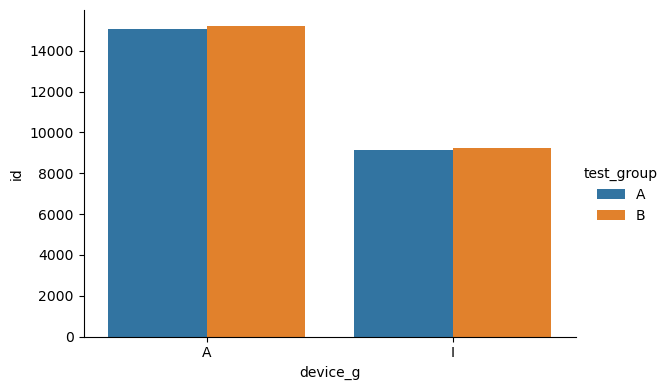

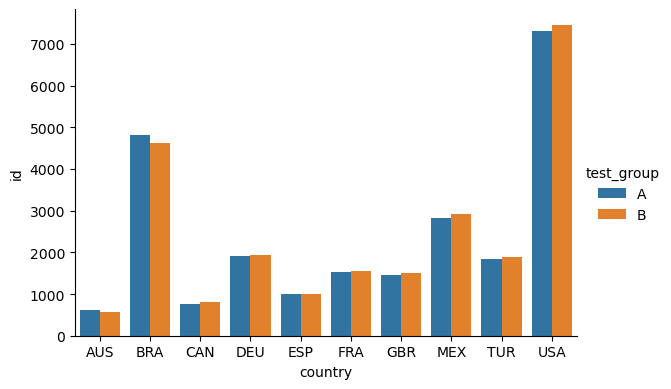

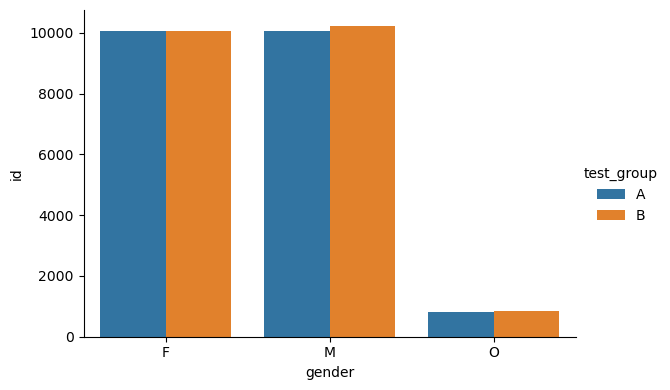

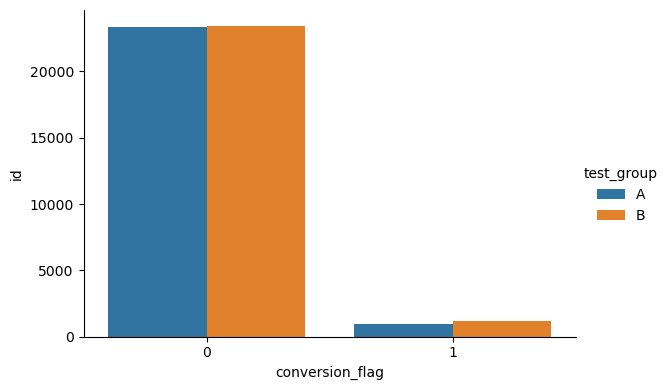

In [269]:
plot_segments_distribution(df_join, #dataframe
                           ["device_g", "country","gender","conversion_flag"], #segments
                           "test_group") #test-factor

In [270]:
#Nice! The destribution looks good

In [271]:
## Using the Chi-square test for conversion
!pip install statsmodels

In [301]:
metrics_CR = df_join.groupby('test_group', as_index=False).agg({'id': 'count', 'conversion_flag': 'sum'})
metrics_CR['conversion_rate'] = round(metrics_CR['conversion_flag'] / metrics_CR['id'] * 100, 2)
metrics_CR

,test_group,id,conversion_flag,conversion_rate
0,A,24343,955,3.92
1,B,24600,1139,4.63


In [296]:
import statsmodels.stats.proportion as proportion


In [297]:
chi2stat, pval, table = proportion.proportions_chisquare(metrics_CR['conversion_flag'], metrics_CR['id']) 

In [298]:
alpha = 0.05

In [309]:
print(round(pval,5))

0.00011


In [300]:
print(pval < alpha)

True


In [310]:
metrics_AOV = df_join.groupby('test_group', as_index=False).agg({'conversions_num': 'sum', 'sum_spent': 'sum'})
metrics_AOV['AOV'] = round(metrics['sum_spent'] / metrics['conversions_num'], 2)
metrics_AOV

,test_group,conversions_num,sum_spent,AOV
0,A,1014,82145.903065,81.01
1,B,1219,83415.326869,68.43


In [ ]:
!pip install bootstrapped

In [ ]:
pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

In [ ]:
??bs.bootstrap_ab

In [ ]:
test = df_join[df_join['test_group'] == 'B']['sum_spent'].dropna().values

In [ ]:
ctrl = df_join[df_join['test_group'] == 'A']['sum_spent'].dropna().values

In [313]:
boot_results = bs.bootstrap_ab(test = test, ctrl = ctrl
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)

In [314]:
boot_results

array([ -5.39264644,  -5.81063269, -14.40034155, ..., -15.75322354,
        -9.68257637, -13.48575752])

In [316]:
borders = np.percentile(boot_results, [2.5, 97.5]) # считаем перцентили
borders

array([-21.28200373,  -4.55168545])

In [281]:
metrics_all = df_join.groupby('test_group', as_index=False).agg({'id': 'count', 'conversion_flag': 'sum','conversions_num': 'sum', 'sum_spent': 'sum'})
metrics_all['conversion_rate'] = round(metrics_CR['conversion_flag'] / metrics_CR['id'] * 100, 2)
metrics_all['AOV'] = round(metrics_all['sum_spent'] / metrics_all['conversions_num'], 2)
metrics_all['average_user_spent'] = round(metrics_all['sum_spent'] / metrics_all['id'], 2)


metrics_all

,test_group,id,conversion_flag,conversions_num,sum_spent,conversion_rate,AOV,average_user_spent
0,A,24343,955,1014,82145.903065,3.92,81.01,3.37
1,B,24600,1139,1219,83415.326869,4.63,68.43,3.39
